In [1]:
# Put reload
%reload_ext autoreload
%autoreload 2

# Imports

In [2]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
from sklearn.metrics import roc_auc_score
from torchvision import datasets
from tqdm import tqdm

sys.path.append("..")

from ratefunctiontorch import OnlineCumulant, RateCumulant

In [3]:
BATCH_SIZE = 50


# Load Resnet And Datasets

In [4]:
model = torch.hub.load(
    "chenyaofo/pytorch-cifar-models", "cifar10_resnet20", pretrained=True
)

Using cache found in C:\Users\Ludvins/.cache\torch\hub\chenyaofo_pytorch-cifar-models_master


In [5]:
# Load CIFAR10 data
transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
)
trainset = datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transform
)
train_loader = torch.utils.data.DataLoader(
    trainset,
    batch_size=BATCH_SIZE,
    shuffle=True,
)
testset = datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform
)
test_loader = torch.utils.data.DataLoader(
    testset,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

testset_svhn = datasets.SVHN(
    root="./data", split="test", download=True, transform=transform
)
test_loader2 = torch.utils.data.DataLoader(
    testset_svhn,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

Files already downloaded and verified
Files already downloaded and verified
Using downloaded and verified file: ./data\test_32x32.mat


In [11]:
lambdas = np.arange(-0.2, 0.5, 0.01)
onlinecumulant = OnlineCumulant(model, 10000)
ratecumulant = RateCumulant(model, test_loader)

  2%|▎         | 5/200 [00:00<00:07, 26.21it/s]


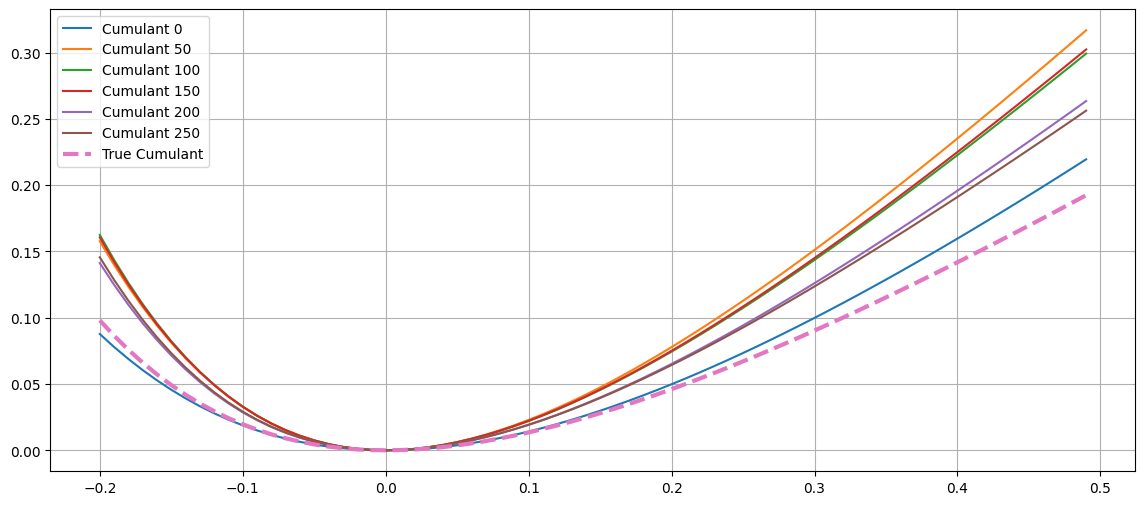

In [12]:
plt.rcParams["figure.figsize"] = (14, 6)

for i, (inputs, labels) in enumerate(tqdm(test_loader)):
    onlinecumulant.update_losses(inputs, labels)
    
    cummulant = onlinecumulant.compute_cumulants(lambdas)
    
    plt.plot(lambdas, cummulant, label = "Cumulant " + str(i * BATCH_SIZE))
    
    if i == 5:
        break

cumulant = ratecumulant.compute_cumulants(lambdas)
plt.plot(lambdas, cumulant, label = "True Cumulant", linestyle = "--", linewidth = 3)
plt.grid()
plt.legend()
plt.show()
    